CPT Resonance

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [171]:
# Initial values
p11, p22, p33 = .75, .25, 0
p12, p13, p23 = 0.433, 0, 0
w1, w2 = 0.25,0.25
d1, d2 = 0, 0.1

P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')

In [172]:
# eoms

'''
P[0] = p11
P[1] = p22
P[2] = p12
P[3] = p13
P[4] = p23
'''

def dP_dt(t, P):
    Pt = np.zeros(5, dtype='complex')
    Pt[0] = 1j * w1 * (np.conj(P[3])-P[3])
    Pt[1] = 1j * w2 * (np.conj(P[4])-P[4])
    Pt[2] = 1j * ((d1+d2)*P[2] + w1*np.conj(P[4]) - w2*P[3])
    Pt[3] = 1j * (d1*P[3] + w1*(1-P[1]-2*P[0]) - w2*(P[2]))
    Pt[4] = 1j * (-1*d2*P[4] + w2*(1-P[0]-2*P[1]) - w1*np.conj(P[2]))
    return Pt


In [173]:
# integrate
tmax = 100
tspan = (0,tmax)

result = solve_ivp(dP_dt, tspan, P0, first_step=0.01, max_step=0.1)
p11f = result.y[0]
p22f = result.y[1]

    
p1and2 = np.add(p11f, p22f)
p33f = np.subtract(np.ones(len(p11f)), p1and2)



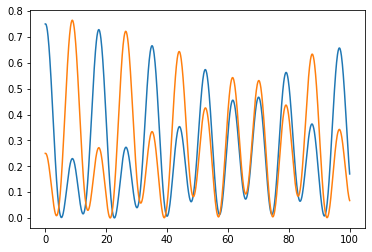

In [174]:
t = np.linspace(0,tmax,num=len(p11f))

plt.plot(t, p11f)
plt.plot(t, p22f)

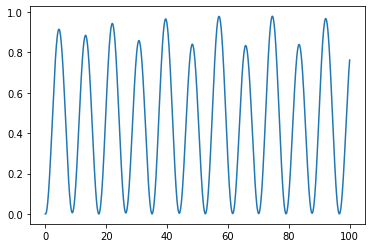

In [175]:
plt.plot(t, p33f)